## Customizing Filters in Typed-FFmpeg

### Introduction to Custom Filters
While Typed-FFmpeg supports most of the FFmpeg filters out-of-the-box, there might be instances where you need to use filters that are not predefined in the library. For such cases, Typed-FFmpeg provides a flexible way to define and utilize custom filters.

### Creating Single-input Custom Filters
Easily create your own single-input custom filters with the `vfilter`, `afilter` method. This allows for direct application of new or specialized video filters not standard in Typed-FFmpeg.

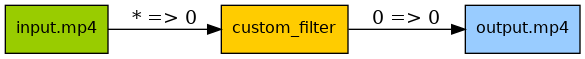

In [1]:
import ffmpeg

# Apply a custom single-input video filter
(
    ffmpeg.input("input.mp4")
    .vfilter(
        name="custom_filter", option1="value1", option2="value2"
    )  # Apply "custom_filter" with specified options
    .output(filename="output.mp4")
)

This code snippet will correspond to the following FFmpeg command line:

In [2]:
(
    ffmpeg.input("input.mp4")
    .vfilter(
        name="custom_filter", option1="value1", option2="value2"
    )  # Apply "custom_filter" with specified options
    .output(filename="output.mp4")
).compile_line()

"ffmpeg -i input.mp4 -filter_complex '[0]custom_filter=option1=value1:option2=value2[s0]' -map '[s0]' output.mp4"

Alternatively:


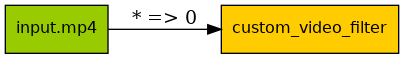

In [3]:
import ffmpeg

# Define a custom video filter for later use
ffmpeg.vfilter(
    ffmpeg.input("input.mp4"),
    name="custom_video_filter",
    option1="value1",
    option2="value2",
)


### Implementing Multi-input Custom Filters
For filters that require multiple inputs, specify the type of each input using the `input_typings` parameter to ensure correct stream handling.


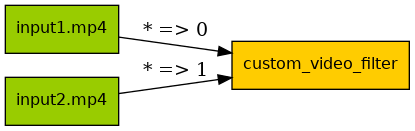

In [4]:
import ffmpeg
from ffmpeg.schema import StreamType

# Create a multi-input custom video filter
(
    ffmpeg.input("input1.mp4").vfilter(
        ffmpeg.input("input2.mp4"),
        name="custom_video_filter",
        input_typings=(StreamType.video, StreamType.video),
    )
)

Alternatively, use the `vfilter`, `afilter` function directly for multi-input scenarios:


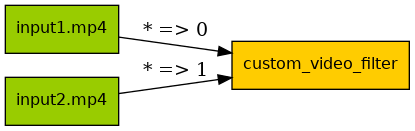

In [5]:
import ffmpeg
from ffmpeg.schema import StreamType

# Define and apply a multi-input custom video filter
ffmpeg.vfilter(
    ffmpeg.input("input1.mp4"),
    ffmpeg.input("input2.mp4"),
    name="custom_video_filter",
    input_typings=(StreamType.video, StreamType.video),
)


### Defining Multi-output Custom Filters
In cases where a filter generates multiple outputs, use `ffmpeg.filter_multi_output` function and specify the expected types of these outputs using the `output_typings` parameter. This feature is particularly useful for filters that split the input stream into several output streams.


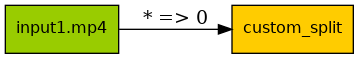

In [6]:
import ffmpeg
from ffmpeg.schema import StreamType

# Create a custom filter that yields multiple outputs
ffmpeg.filter_multi_output(
    ffmpeg.input("input1.mp4"),
    name="custom_split",
    input_typings=(StreamType.video,),
    output_typings=(StreamType.video, StreamType.video),
)

By following these guidelines, you can extend the functionality of Typed-FFmpeg to accommodate any specific filtering needs, ensuring maximum flexibility and efficiency in your video processing tasks.
